In [193]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None


# path = 'unseen_species_model/unseen_species_model.csv'
path = 'unseen_species_model/unseen_species_model_bayesian.csv'


df_cultura = pd.read_csv(path, index_col = [0])

# df_cultura = df_cultura.rename(columns = {'f0_min':'min_f0', 'f0_max':'max_f0'})


df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura['N_est_min']  =  df_cultura['min_f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura['N_est_max']  =  df_cultura['max_f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual

print(len(set(df_cultura.individual_wikidata_id)))

df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'N_est_min':'sum', 'N_est_max':'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})
df_cultura = df_cultura[df_cultura['decade'] <=1850]

df_cultura_world = df_cultura.drop('region_name', axis=1).groupby('decade').sum().reset_index()
df_cultura_world['region_name']='world'

df_cultura = pd.concat([df_cultura_world, df_cultura])

# Add indiviudals not taken into account into the unseen-species model
df_works = pd.read_csv('db_extract/df_indi__work>2.csv', index_col=[0])
df_works = df_works.groupby(['decade', 'region_name'])['individual_wikidata_id'].count().reset_index()
df_works = df_works.rename(columns = {'individual_wikidata_id':'f>3'})

df_cultura = pd.merge(df_cultura, df_works, on = ['region_name', 'decade'], how='left')
df_cultura = df_cultura.fillna(0)


df_cultura['N_est'] = df_cultura['N_est'] + df_cultura['f>3']
df_cultura['N_est_min'] = df_cultura['N_est_min'] + df_cultura['f>3']
df_cultura['N_est_max'] = df_cultura['N_est_max'] + df_cultura['f>3']
df_cultura['score'] = df_cultura['score'] + df_cultura['f>3']

df_cultura = df_cultura[~((df_cultura["region_name"] == "Arabic world") & (df_cultura["decade"] < 600))]


109363


In [194]:
# Define a custom rounding function
def custom_round(x):
    if x >= 100000:
        return np.round(x, -5)  # Round to nearest 100000
    elif x >= 10000:
        return np.round(x, -4)  # Round to nearest 10000
    elif x >= 1000:
        return np.round(x, -3)  # Round to nearest 1000
    else:
        return np.round(x, -1)  # Round to nearest 10

In [195]:
df_cultura.head(5)

,decade,N_est,N_est_min,N_est_max,score,region_name,f>3
0,-820,1.634989,1.051600,12.827334,1.0,world,0.0
1,-800,8.738134,4.178855,86.876036,2.0,world,0.0
2,-700,10.516406,5.942297,31.108664,2.0,world,0.0
3,-680,39.646014,21.984063,119.344411,3.0,world,0.0
4,-660,26.584840,15.519127,69.705509,4.0,world,0.0


In [196]:
list(set(df_cultura['region_name']))


['East Slavic',
 'Arabic world',
 'Northern Japan',
 'Chinese world',
 'Korea',
 'Southern China',
 'Southern Japan',
 'Nordic countries',
 'Greek World',
 'Italy',
 'world',
 'Spain',
 'Indian world',
 'United Kingdom',
 'Persian world',
 'Central Europe',
 'Portugal',
 'Southwestern Europe',
 'Northwestern Europe',
 'German world',
 'Northern China',
 'Low countries',
 'Latin World',
 'France',
 'Japan']

In [197]:


df_western = df_cultura[df_cultura['region_name'].isin([
                'Italy',
                'Portugal',
                'German world',
                'United Kingdom',
                'Spain',
                'Low countries',
                'France',
                'Nordic countries'])]

df_western = df_western.drop('region_name', axis=1).groupby('decade').sum().reset_index()
df_western['region_name']='Latin World'
df_western = df_western[df_western['decade']>500]
df_cultura = pd.concat([df_cultura, df_western])


df_greek_latin= df_cultura[df_cultura['region_name'].isin([
                'Latin World', 'Greek World'])]


df_greek_latin = df_greek_latin.drop('region_name', axis=1).groupby('decade').sum().reset_index()
df_greek_latin['region_name']='Greek Latin'
#df_western = df_western[df_western['decade']>500]

df_cultura = pd.concat([df_cultura, df_greek_latin])

list(set(df_cultura['region_name']))

['East Slavic',
 'Arabic world',
 'Northern Japan',
 'Chinese world',
 'Korea',
 'Southern China',
 'Southern Japan',
 'Nordic countries',
 'Greek World',
 'Greek Latin',
 'Italy',
 'world',
 'Spain',
 'Indian world',
 'United Kingdom',
 'Persian world',
 'Central Europe',
 'Portugal',
 'Southwestern Europe',
 'Northwestern Europe',
 'German world',
 'Northern China',
 'Low countries',
 'Latin World',
 'France',
 'Japan']

In [198]:
# df_cultura = pd.concat([df_cultura, df_cultura_latin_after])
# df_cultura = df_cultura.reset_index(drop=True)


df_cultura_muslim= df_cultura[df_cultura['region_name'].isin(['Arabic world', 'Persian world'])]
df_cultura_muslim['region_name']='MENA'
df_cultura_muslim = df_cultura_muslim.groupby(['region_name', 'decade']).sum().reset_index()
# df_cultura_muslim = df_cultura_muslim[df_cultura_muslim['decade']>500]
df_cultura_muslim


df_cultura = pd.concat([df_cultura, df_cultura_muslim])
df_cultura = df_cultura.reset_index(drop=True)

df_pop = pd.read_csv('/Users/charlesdedampierre/Desktop/cultura_project/gdp_analysis/results/population_interpolated_regions.csv', index_col = [0])
df_pop['decade'] = df_pop['year'].apply(lambda x: round(x /50) * 50)
df_pop = df_pop.groupby(['region_name', 'decade'])['pop'].mean().reset_index()

# df_pop_latin_after = df_pop[df_pop['region_name'].isin(Latin_world_after)]
# df_pop_latin_after['region_name']='Latin World'
# df_pop_latin_after = df_pop_latin_after.groupby(['region_name', 'decade']).sum().reset_index()
# df_pop_latin_after = df_pop_latin_after[df_pop_latin_after['decade']>500]
# df_pop = pd.concat([df_pop, df_pop_latin_after])


df_pop_muslim = df_pop[df_pop['region_name'].isin(['Arabic world','Persian world'])]
df_pop_muslim['region_name']='MENA'
df_pop_muslim = df_pop_muslim.groupby(['region_name', 'decade']).sum().reset_index()
df_pop_muslim = df_pop_muslim[df_pop_muslim['decade']>500]

df_pop = pd.concat([df_pop, df_pop_muslim])
df_pop = df_pop.reset_index(drop=True)

pop = False
if pop is True:

    df_cultura= pd.merge(df_cultura, df_pop, on = ['region_name', 'decade'])
    df_cultura['N_est'] = df_cultura['N_est']/ df_cultura['pop']

    df_cultura['N_est'] = df_cultura['N_est']/df_cultura['pop']
    df_cultura['N_est_min'] = df_cultura['N_est_min']/df_cultura['pop']
    df_cultura['N_est_max'] = df_cultura['N_est_max']/df_cultura['pop']

    print('Population updated')

In [199]:
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

df = df_cultura.copy()
df = df_cultura[df_cultura['region_name'].isin(['Chinese world', 'Latin World', 'MENA', 'Greek World', 'Japan', 'Indian world', 'East Slavic'])]
df = df[~((df['region_name'] == 'Japan') & (df['decade'] < 600))]
df = df[~((df["region_name"] == "MENA") & (df["decade"] < 600))]

df['region_name'][df['region_name']=='MENA'] = 'West Asia and North Africa'
df['region_name'][df['region_name']=='Latin world'] = 'Western Europe'
df['region_name'][df['region_name']=='East Slavic'] = 'East Slavic World'
df['region_name'][df['region_name']=='Indian world'] = 'Indian World'
df['region_name'][df['region_name']=='Chinese world'] = 'Chinese World'
df['region_name'][df['region_name']=='Latin World'] = 'Western World'


interval = 10

df['region_name'][df['region_name']=='Western World'] = 'Western Europe'
df['decade'] = df['decade'].apply(lambda x: round(x /interval) * interval)
df = df.groupby(['region_name', 'decade']).sum().reset_index()
df = df[df['decade']<=1850]


df[df['region_name']=='Japan']


# df
import itertools

all_years = range(-850, 1900, interval)
all_countries = df['region_name'].unique()
df_regions_years = pd.DataFrame(list(itertools.product(all_countries, all_years)), columns=['region_name', 'decade'])
df = pd.merge(df, df_regions_years, on = ['region_name', 'decade'], how = 'outer')
df = df.sort_values(by=['region_name', 'decade'])


#df.loc[(df['decade'] == -850) & (df['N_est'].isna()), 'N_est'] = 0.1

df_int = []
for country in df['region_name'].unique():
    res= df[df['region_name']==country]
    res['N_est'] = pd.to_numeric(res['N_est'], errors='coerce')
    res['N_est'] = res['N_est'].interpolate(how = 'linear')
    df_int.append(res)

linear_interpolated_final = pd.concat([x for x in df_int])
linear_interpolated_final


linear_interpolated_final = linear_interpolated_final[~linear_interpolated_final['N_est'].isna()]
linear_interpolated_final[linear_interpolated_final['region_name']=='Greek World']

df = linear_interpolated_final.copy()
df = df.sort_values(['region_name', 'decade'], ascending=(False, True))
# Calculating the growth rate for N_est year over year by region
df['growth_rate'] = df.groupby('region_name')['N_est'].pct_change(periods=1)

df = df.dropna()

df['factor_to_max'] = df['N_est_max']/df['N_est']
df['factor_to_min'] = df['N_est_min']/df['N_est']

# make a confidence interval
df['factor_to_max'] = df['factor_to_max'].fillna(method='ffill')
df['factor_to_min'] = df['factor_to_min'].fillna(method='ffill')


# Calculate the confidence intervals with adjustments for negative growth rates
df['growth_rate_min'] = np.where(
    df['growth_rate'] >= 0,
    df['growth_rate'] * df['factor_to_min'],  # Positive case
    df['growth_rate'] * df['factor_to_max']  # Negative case
)
df['growth_rate_max'] = np.where(
    df['growth_rate'] >= 0,
    df['growth_rate'] * df['factor_to_max'],  # Positive case
    df['growth_rate'] * df['factor_to_min']  # Negative case
)


list(set(df['growth_rate']>=df['growth_rate_min']))
list(set(df['growth_rate']<=df['growth_rate_max']))


df = df[['region_name', 'decade','growth_rate']].copy()

df['growth_rate'] = df.groupby('region_name')['growth_rate'].rolling(window=3, min_periods=1).mean().reset_index(0, drop=True)
df



/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_75932/678474925.py:65: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['factor_to_max'] = df['factor_to_max'].fillna(method='ffill')
/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_75932/678474925.py:66: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['factor_to_min'] = df['factor_to_min'].fillna(method='ffill')


,region_name,decade,growth_rate
734,Western Europe,-260,0.079035
735,Western Europe,-220,0.045038
736,Western Europe,-210,0.075296
737,Western Europe,-200,0.994772
738,Western Europe,-180,0.795803
...,...,...,...
169,Chinese World,1810,0.049136
170,Chinese World,1820,0.129077
171,Chinese World,1830,0.079889
172,Chinese World,1840,0.226200


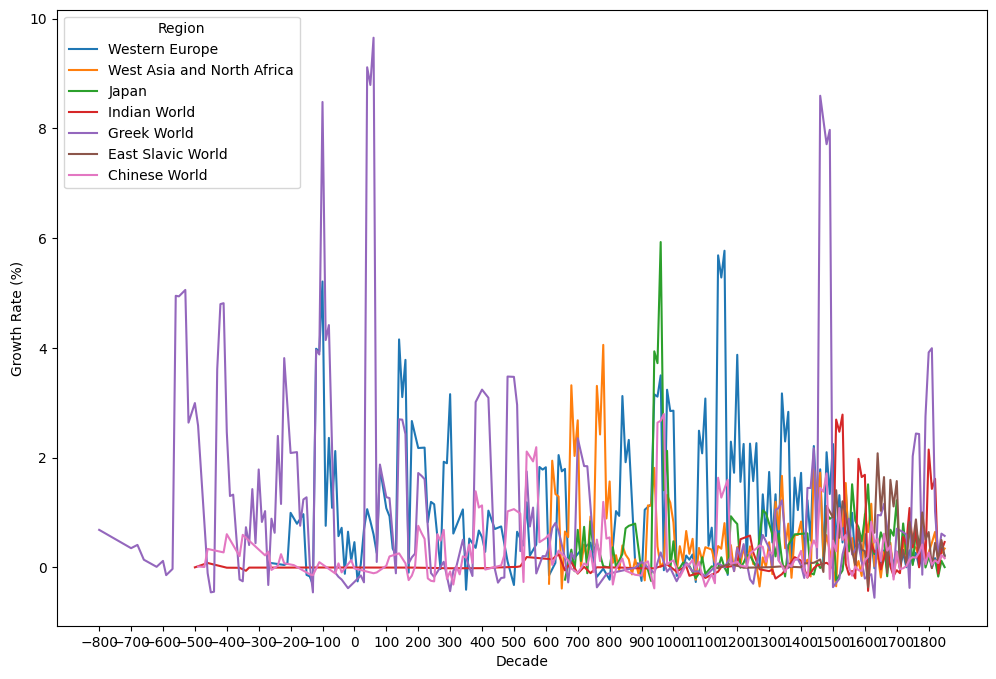

In [200]:

# remove the first value
#df = df.groupby('region_name').apply(lambda x: x.iloc[1:]).reset_index(drop=True)
# df = df.groupby('region_name').apply(lambda x: x.iloc[1:]).reset_index(drop=True)


# Plotting the growth rates for each region
fig, ax = plt.subplots(figsize=(12, 8))
for region in df['region_name'].unique():
    # if region == 'Western Europe':
        region_data = df[df['region_name'] == region]
        ax.plot(region_data['decade'], region_data['growth_rate'], label=region)

ax.set_xlabel('Decade')
ax.set_ylabel('Growth Rate (%)')
ax.set_title('')
ax.legend(title='Region')
ax.set_xticks(np.arange(-800, 1801, 100))  # Set x-ticks every 200 years
plt.grid(False)
plt.show()


In [201]:
#
#the second point is - given how much emphaiss we now put on the advent of sustained growth we could 
# a) plot growth rates, not levels
# b) conduct some formal break-point tests, ideally showing a discontinuits in the late medieval period


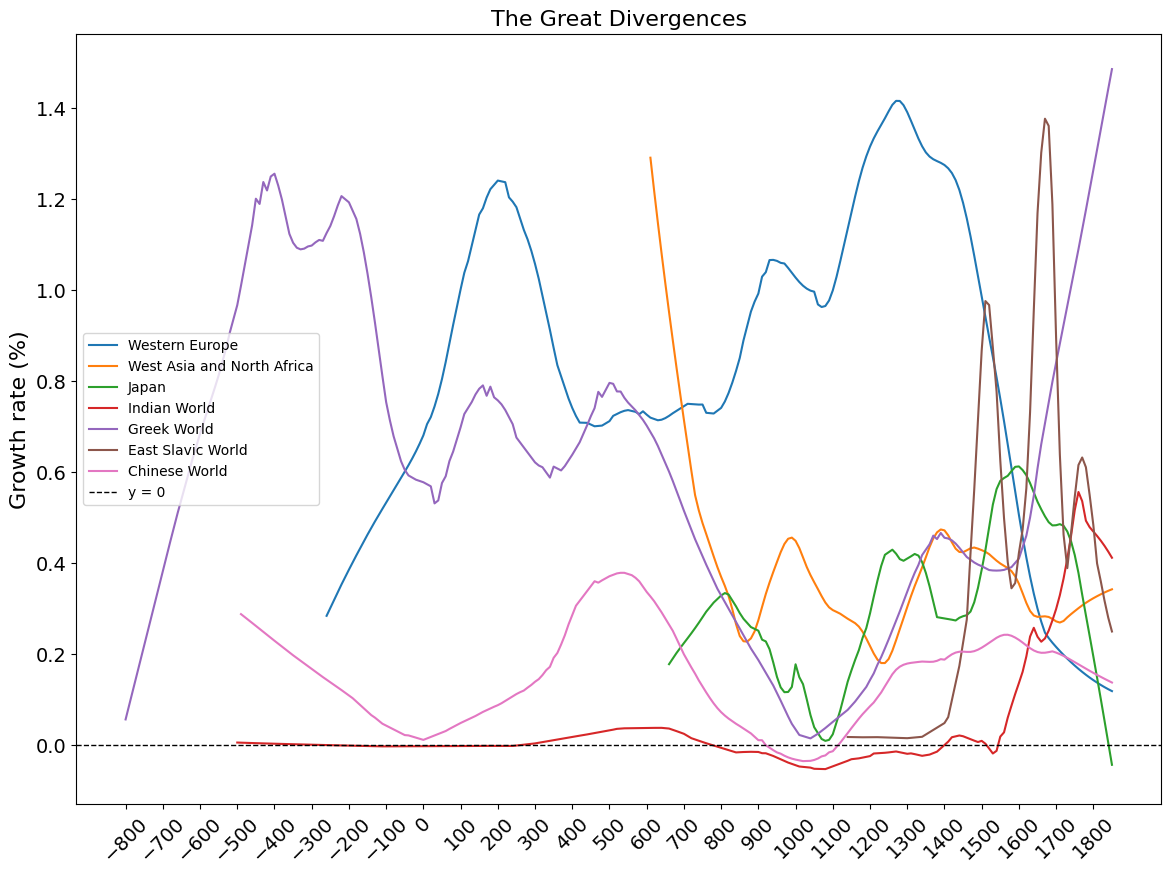

In [202]:

# # Filtering logic
# df['N_est'] = np.log(df['N_est'])  # Applying log transformation
# df['N_est_min'] = np.log(df['N_est_min'])  # Min bound log
# df['N_est_max'] = np.log(df['N_est_max'])  # Max bound log


# # Define your color scheme
# colors = {
#     "Western Europe": "#00008b",
# }

fig, ax = plt.subplots(figsize=(14, 10))

# List for storing text annotations for later adjustment
texts = []

# Calculate the maximum smoothed value for normalization
max_n_est = float('-inf')

# Adding smoothing and plotting for each region
for region in df['region_name'].unique():

    region_data = df[df['region_name'] == region]
    region_data.sort_values(by='decade', inplace=True)


    n = 0.2

    # LOESS smoothing
    smoothed = lowess(region_data['growth_rate'], region_data['decade'], frac=n)
    # smoothed_min = lowess(region_data['growth_rate_min'], region_data['decade'], frac=n)
    # smoothed_max = lowess(region_data['growth_rate_max'], region_data['decade'], frac=n)

    # Update maximum n_est if current is higher
    #max_n_est = max(max_n_est, max(smoothed[:, 1]))

    # Plotting the smoothed mean estimate
    ax.plot(smoothed[:, 0], smoothed[:, 1], label=region)
    #ax.plot(region_data['decade'], region_data['growth_rate'], label=region)

    # # # Plotting the confidence interval as a fill between
    # ax.fill_between(smoothed[:, 0], smoothed_min[:, 1], smoothed_max[:, 1], alpha=0.3)
    
# ticks_log = ax.get_yticks()

# # Calculate the original values from the log scale ticks
# ticks_original = np.exp(ticks_log)  # Adjust if a different base is used for logging

# # Round to the nearest 10

# ticks_rounded = [custom_round(tick) for tick in ticks_original]

# #ticks_rounded = np.around(ticks_original / 10) * 10

# # Remove duplicates, keeping only the last occurrence
# unique_ticks = {}
# for tick, original in zip(ticks_rounded, ticks_log):
#     unique_ticks[tick] = original  # This will overwrite the tick with its last occurrence

# # Now, set the ticks and labels, skipping duplicates
# final_ticks = sorted(unique_ticks.items())  # Sort ticks by their values
# ax.set_yticks([item[1] for item in final_ticks])  # Set the unique tick positions
# ax.set_yticklabels(['{:.0f}'.format(item[0]) for item in final_ticks])  # Set the unique tick labels

# Set the size of x-axis and y-axis tick labels
ax.tick_params(axis='x', labelsize=14)  # Increase x-axis tick label size
ax.tick_params(axis='y', labelsize=14)  # Increase y-axis tick label size
ax.axhline(y=0, color='black', linestyle='--', linewidth=1, label='y = 0')


ax.set_xticks(np.arange(-800, 1850, 100))  # Set x-ticks every 200 years
# Rotating x-ticks by 45 degrees for better readability
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('')
ax.set_ylabel('Growth rate (%)', fontsize = 16)
ax.set_title('The Great Divergences', fontsize = 16)
ax.legend()
plt.show()


In [203]:
df[df['region_name']=='Japan']

,region_name,decade,growth_rate
503,Japan,660,-0.222792
504,Japan,680,0.324265
505,Japan,690,-0.068805
506,Japan,700,0.684720
507,Japan,710,0.117038
...,...,...,...
602,Japan,1810,0.052241
603,Japan,1820,0.137221
604,Japan,1830,-0.166967
605,Japan,1840,0.121198


In [204]:
list(set(df_cultura['region_name']))

['East Slavic',
 'Arabic world',
 'Northern Japan',
 'Chinese world',
 'Korea',
 'Southern China',
 'Southern Japan',
 'Nordic countries',
 'Greek World',
 'Greek Latin',
 'Italy',
 'world',
 'Spain',
 'Indian world',
 'United Kingdom',
 'Persian world',
 'Central Europe',
 'Portugal',
 'Southwestern Europe',
 'Northwestern Europe',
 'MENA',
 'German world',
 'Northern China',
 'Low countries',
 'Latin World',
 'France',
 'Japan']